# Homework 5
https://github.com/tawest2020/taw-bios512

## Libraries

In [1]:
install.packages("Rtsne", repos="https://cloud.r-project.org")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(ggplot2)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1

In [3]:
df <- read_csv("wine.csv")
colnames(df)
summary(df)

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Alcohol"                      "Malicacid"                   
 [3] "Ash"                          "Alcalinity_of_ash"           
 [5] "Magnesium"                    "Total_phenols"               
 [7] "Flavanoids"                   "Nonflavanoid_phenols"        
 [9] "Proanthocyanins"              "Color_intensity"             
[11] "Hue"                          "0D280_0D315_of_diluted_wines"
[13] "Proline"                      "class"

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

In [22]:
df_scaled <- df %>%
  mutate(
    across(
      .cols = -class,
      .fns  = ~ as.numeric(scale(.x))
    )
  )

Scaling is important to address due to each variable/column having a different range of numbers. For example, alcohol has a range of ~11-15 while Magneseum has a range of 70-162. Due to Magneseum having a larger spread, PCA would favor this variable more when we want it to be fairly distributed.

Centering is important to address due to avoiding mean offset in favor of measuring from the center of the data. For example, the mean of alcohol is likely ~13 while the mean of Magneseum is likely ~116. Centering will move their mean to 0 and more look at the difference of spread travelling in each direction (2 vs 46).

## Question 3

### a) Perform PCA

In [5]:
pca_result <- prcomp(df %>% select(-class),
                     center = TRUE,
                     scale. = TRUE)

### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

In [6]:
summary(pca_result)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

Based on "Proportion of Varience", 36.2% of total varience is explained by PC1, while 19.1% of total varience is explained by PC2.

### c) Why are we doing PCA first?
We want to reduce the amount of information we are intaking to simplyfy our findings. Even though there are 13 variables, we do not need to run all 13 PCs, we can select 2 and still have a good idea of the data.

### d) What is the rotation matrix? Print it explicitly.
The rotation matrix displays the contributions of each variables towards the Principle Componets.

In [7]:
pca_result$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630,0.26566365,-0.21353865,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
Malicacid,0.245187580,-0.224930935,0.08901289,0.53689028,-0.03521363,-0.53681385,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556,0.14302547,-0.15447466,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803
Alcalinity_of_ash,0.239320405,0.010590502,0.61208035,0.06085941,-0.06610294,0.10082451,-0.28696914,-0.42797018,-0.20044931,-0.05279942,-0.47931378,0.05574287,-0.09168285
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658,-0.72704851,-0.03814394,0.32288330,0.15636143,-0.27140257,-0.06787022,-0.07128891,-0.06222011,-0.05677422
Total_phenols,-0.394660845,-0.065039512,0.14617896,0.19806835,0.14931841,0.08412230,-0.02792498,0.40593409,-0.28603452,0.32013135,-0.30434119,0.30388245,0.46390791
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479,0.10902584,0.01892002,-0.06068521,0.18724536,-0.04957849,0.16315051,0.02569409,0.04289883,-0.83225706
Nonflavanoid_phenols,0.298533103,-0.028779488,0.17036816,-0.20330102,0.50070298,0.25859401,0.59544729,0.23328465,-0.19550132,-0.21553507,-0.11689586,-0.04235219,-0.11403985
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653,-0.13685982,0.53379539,0.37213935,-0.36822675,0.20914487,-0.13418390,0.23736257,0.09555303,0.11691707
Color_intensity,0.088616705,-0.529995672,-0.13730621,0.06592568,0.07643678,0.41864414,-0.22771214,0.03379692,-0.05621752,0.29077518,-0.03183880,-0.60422163,0.01199280


### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.

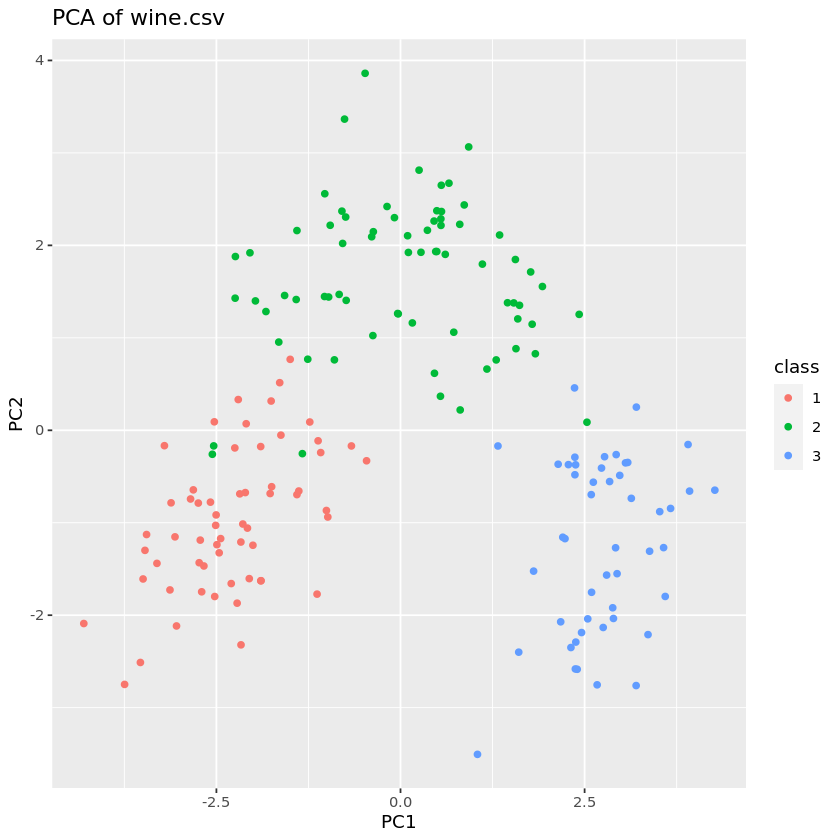

In [8]:
pca_df <- as.data.frame(pca_result$x)

pca_df$class <- as.factor(df$class)

ggplot(pca_df, aes(x = PC1, y = PC2, color = class)) +
  geom_point() +
  labs(title = "PCA of wine.csv", x = "PC1", y = "PC2")

### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

The 3 classes are grouped together with little overlap.

PC1: It appears each class starting from 1 moves from the negative to the positive. This indicates that PC1 is the main axis of variation among wines, with class 1 containing wines lower in alcohol/phenols, higher in acids, and class 3 having wines higher in alcohol/phenols, lower in acids.

PC2: Class 2 is the only one in the positive. This indicates that PC2 captures more unique vairations to class 2. Possible variables include color intensity, hue, flavanoids.

### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.

PCA fails if the variation is not in a linear structure. For example, PCA does not understand how to interpret a quadratic line and would instead approximate as a linear line of best fit from it. PCA also fails if the the varience is uniform in each direction, providing a circular or spherical shape.

### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.

Vectors work within the linear two-dimensional space, like how we plotted PC1 and PC2 on the x and y axis.

Manifolds can be non-linear and curved in their visualization.

t-SNE works with data that is a manifold so it can perform high dimension analysis and understand the data past a flat level.

## Question 4

### a) Perform T-SNE

In [52]:
set.seed(123)

tsne <- pca_df %>%
  select(PC1:PC10) %>%
  as.matrix()
tsne_out <- Rtsne(tsne, dims = 2, check_duplicates = FALSE)

### b) Plot the results in 2D

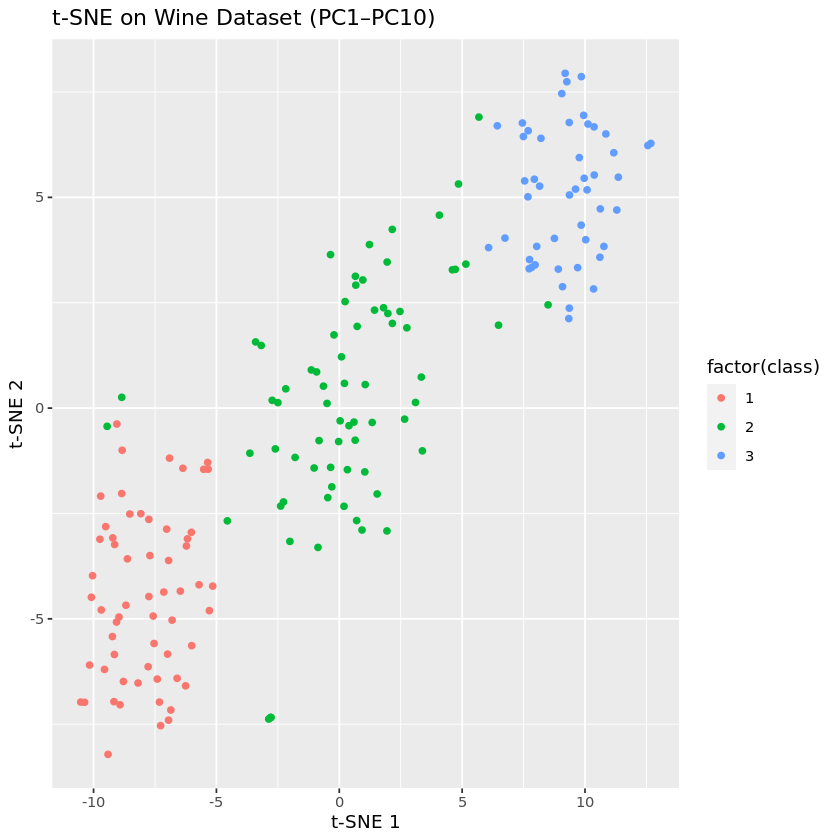

In [53]:
results <- as_tibble(tsne_out$Y)
colnames(results) <- c("Dim1", "Dim2")
results$class <- df_scaled$class

ggplot(results, aes(x = Dim1, y = Dim2, color = factor(class))) +
  geom_point() +
  labs(title = "t-SNE on Wine Dataset (PC1–PC10)", x = "t-SNE 1", y = "t-SNE 2")

### c) Why didn't we stop at PCA?

Our PCA was not as clean as the T-SNE optimizes the placement of points so that there is a more clear trend line between classes.

### d) What other types of data does this workflow make sense for?

In the sense of Public Health, multi-variable patient records from hospital data would see a lot of benefits from this workflow, as there are many interlinked variables that would be highlighted such as blood pressure, cholesterol, and pulse rate, vs. eye color, race, and ethnicity.